Jacob Solomon

Ryan Little

Physics 260 - Final Project

# Optimizing the efficiency of a magnetic propulsion system



## 1. Flat rings on the floor

### Optimizing B-field produced by the tube
parameters to be investigated:

1. arrangement of loops
    a. radius
    b. spacing
    c. side-by-side?
2. current in loops
    a. how much current in each wire (highest field strength to input power ratio)
    b. different amount of current in each wire?
3. TBD
.
.
.


Optimizing: Strength of B-field (MAX), Uniformity of B-field (MAX), Energy required to produce such B-field (MIN)

### Optimizing the force acting on the pod
parameters to be investigated:

1. location of magnetic dipole within B-field

2. multiple dipoles?

## 2. Solenoid tube

parameters TBD



### Import libraries


In [214]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
## The next line causes matplot lib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline    
from mpl_toolkits.mplot3d import Axes3D   ## this is a special library to plot in 3d we are using today
import matplotlib as mpl
import matplotlib.cm as cm
import sys as sys

### Function for calculating B-field at a point due to a ring with current

In [215]:
#####  B field function simplified
def Bloop(r_loop,x_pos,y_pos,z_pos,I,x,y,z):
    '''
    Parameters:
    r_loop: the radius of each loop
    x_pos: x coordinate of ring center
    y_pos: y coordinate of ring center
    z_pos: z coordinate of ring center
    I: how much current is in the ring
    x: x coordinate of point the function is solving for
    y: y coordinate of point the function is solving for
    z: z coordinate of point the function is solving for
    '''
    d_theta = 2*np.pi/100
    theta = np.arange(0, 2*np.pi, d_theta)
    x_loop = r_loop*np.cos(theta) + x_pos
    y_loop = r_loop*np.sin(theta) + y_pos
    
    dl_x = -r_loop * d_theta * np.sin(theta)
    dl_y = r_loop * d_theta * np.cos(theta)
    
    x_sep = x - x_loop
    y_sep = y - y_loop
    z_sep = z - z_pos
    
    mag_rsep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
    
    Bx = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_y*z_sep)*mag_rsep**-3)
    By = np.sum((1.2566e-6)/(4*np.pi)*I*(-dl_x*z_sep)*mag_rsep**-3)
    Bz = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_x*y_sep-dl_y*x_sep)*mag_rsep**-3)
    
    return(Bx,By,Bz)

### Function for creating a plane of B-field data in the xz plane

In [216]:
def B_xz_plane(x_min, x_max, z_min, z_max, x_step, z_step, y_value, r_loop, x_pos, y_pos, z_pos, I):
    '''
    parameters:
    x_min: minimum x value of plane
    x_max: maximum x value of plane
    z_min: minimum z value of plane
    z_max: maximum z value of plane
    x_step: distance from each x value to the next
    z_step: distance from each z value to the next
    y_value: y value of xz plane
    R_loop: radius of the ring
    x_pos: x coordinate of ring center
    y_pos: y coordinate of ring center
    z_pos: z coordinate of ring center
    I: how much current is in the ring
    '''
    x_range = np.arange(x_min, x_max, x_step)
    z_range = np.arange(z_min, z_max, z_step)
    
    Bx = np.zeros((np.size(z_range),np.size(x_range)))
    By = np.zeros((np.size(z_range),np.size(x_range)))
    Bz = np.zeros((np.size(z_range),np.size(x_range)))
    
    i = 0
    while(i < np.size(x_range)):
        n = 0
        while(n < np.size(z_range)):
            Bx[n,i], By[n,i], Bz[n,i] = Bloop(r_loop,x_pos,y_pos,z_pos,I,x_range[i],y_value,z_range[n])
            n += 1
        i += 1
    return(Bx, By, Bz)

In [352]:
## define global parameters
x_min = -10
x_max = 10
z_max = 0.99
x_step = 0.2
z_step = 0.05
y_value = 0
z_pos = 0
I = 1000
R_loop = .5

## 1. Flat rings on the floor - Optimizing B-field - spacing of rings in a single line

Radius = 0.5m

arrangement: single line

Current = 100A

### First Iteration
Spacing (center to center) = 1m (no overlap)

for force, Jeff said the force on a dipole equals the cross product of the dipole moment, M, and the B-field
and the dipole of a ring of current equals the magnitude of current times the area vector


FIRST ITERATION


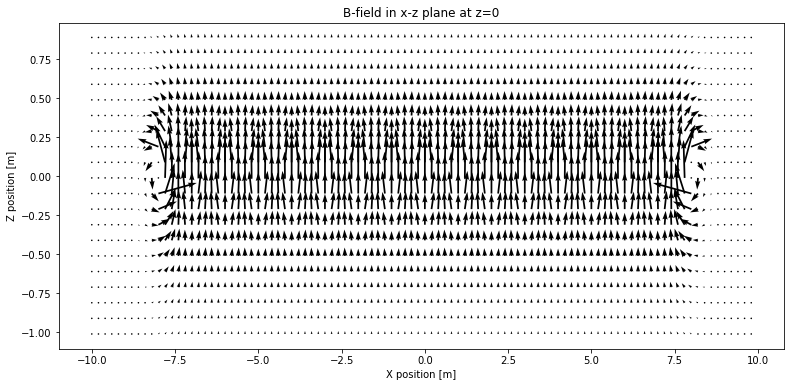

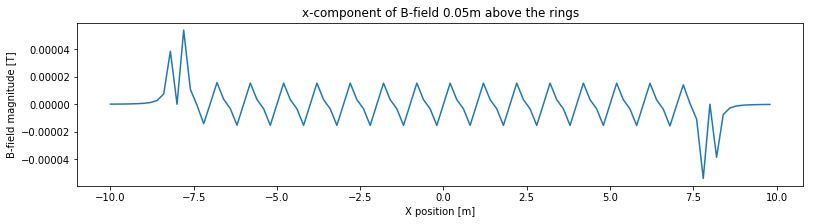

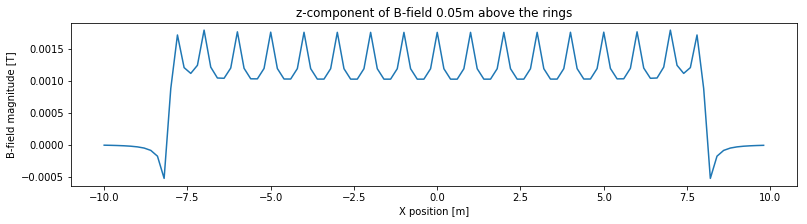

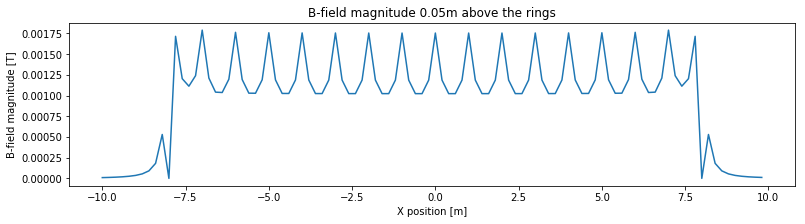

Shape of B_mag array:  (20, 100)


In [353]:
## define local parameters
z_min = -1.01
z_step = 0.1
x_pos = 0
y_pos = 0
num_rings = 16
spacing = 1


## the while loop that calls the function to solve for the B-field
m = 0
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*250):
            ok[n,i] = 0 
        n += 1
    i += 1
    
## plots    
print "FIRST ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, ok[10,:]*Bx[10, :])
plt.title('x-component of B-field 0.05m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bz[10, :])
plt.title('z-component of B-field 0.05m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, ok[10,:]*B_mag[10, :])
plt.title('B-field magnitude 0.05m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

print "Shape of B_mag array: ", np.shape(B_mag)

when interpreting these vector plots keep in mind that we are only concerned with the region in the middle where the b-field falls into a constant pattern. The only reason why we include the boundary conditions in the plots is to give more context and help the viewer understand what he/she is looking at.


RESULTS: the b-field is fairly uniform but could still be a lot better. There is no overlap in this first configuration and we suspect that if the rings overlap the b-field produced will be much more uniform. In the next few iterations we will overlap the rings more and more to see how it affects the b-field.

MOVING FORWARD WE WILL ONLY SHOW THE REGION WHERE Z > 0 IN THE VECTOR PLOTS because the b-field will be symetrical on either side of the x-y plane and only solving for the region where z > 0 will speed up our program.

### Second Iteration
Spacing(center to center) = 0.9m 


SECOND ITERATION


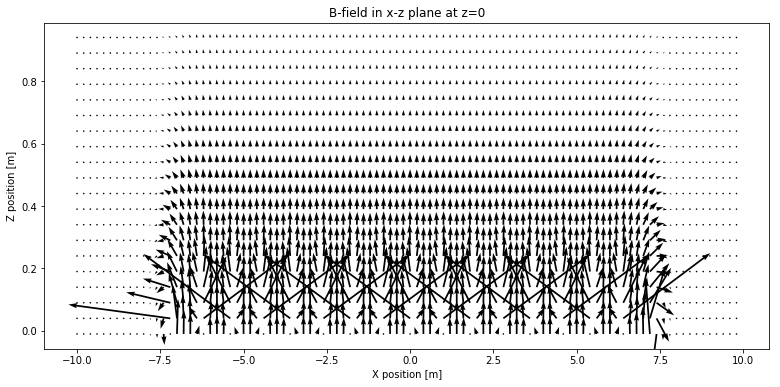

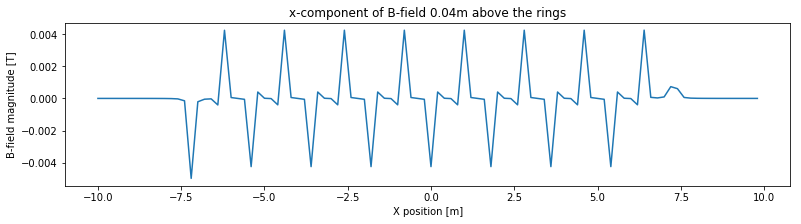

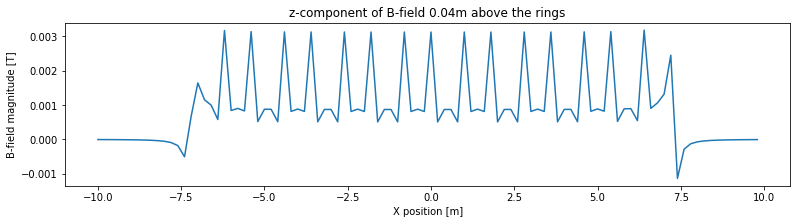

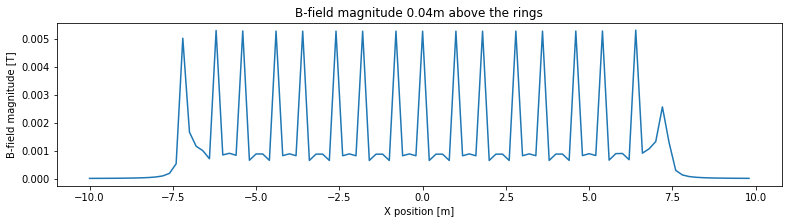

Shape of B_mag array:  (20, 100)


In [354]:
## define local parameters
x_pos = 0
y_pos = 0
z_min = -0.01
z_step = 0.05

## the while loop that calls the function to solve for the B-field
m = 0
num_rings = 16 # np.floor(x_max*2/R_loop)
spacing = 0.9
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.max(B_mag)/5):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
print "SECOND ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bx[1, :])
plt.title('x-component of B-field 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bz[1, :])
plt.title('z-component of B-field 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[1, :])
plt.title('B-field magnitude 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

print "Shape of B_mag array: ", np.shape(B_mag)

the z values go from -0.01m to 0.99m, and there are  20 rows in the B-field arrays, so each row represents a 0.05m shift from the row below/above it. By indexing the 2nd row of the three b-field arrays for each of the three graphs above we are looking at a line 0.04m above the rings

A spacing of 0.9m produces a stronger but more irratic b-field. The x component of the b-field is even negative roughly over roughly half of the region. This would waste a lot of energy because the force vector on the magnetic dipole of the pod would be changing directions a lot, doing work in the z direction (we only want force in the x direction). In the next configuration the rings will overlap more.

### Third Iteration
Spacing (center to center) = 0.5m 


THIRD ITERATION


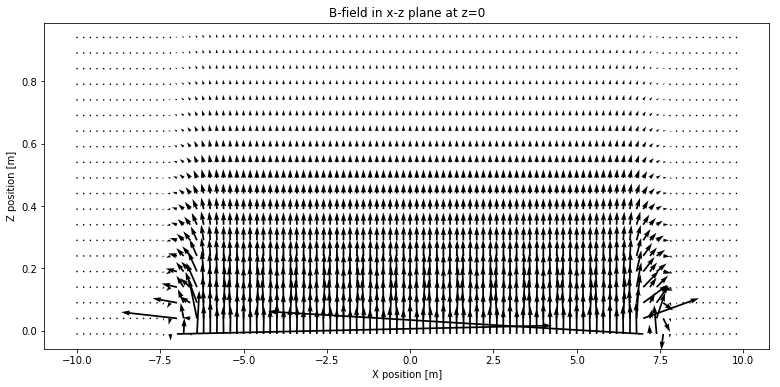

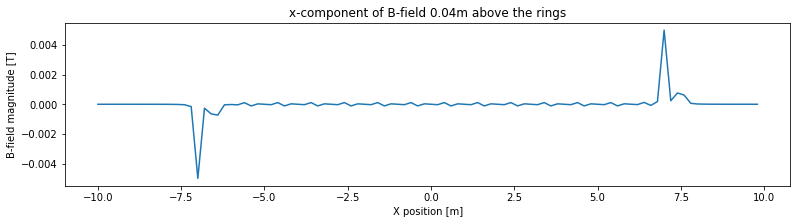

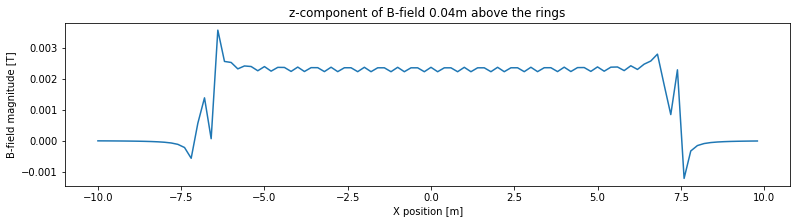

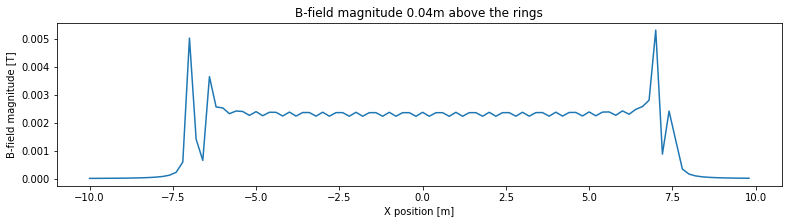

In [355]:
## define local parameters
x_pos = 0
y_pos = 0
z_min = -0.01
z_step = 0.05

## the while loop that calls the function to solve for the B-field
m = 0
num_rings = 28 # np.floor(x_max*2/R_loop)
spacing = 0.5
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*20000000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots 
print "THIRD ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bx[1, :])
plt.title('x-component of B-field 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bz[1, :])
plt.title('z-component of B-field 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[1, :])
plt.title('B-field magnitude 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

spacing: 0.5m . 

This B-field is significantly stronger and more uniform than both previous iterations. This shows that overlapping the ringsTo find the sweet spot of how much the rings should overlap we will keep on experimenting.

### Fourth Iteration
Spacing (center to center) = 0.25m


FOURTH ITERATION


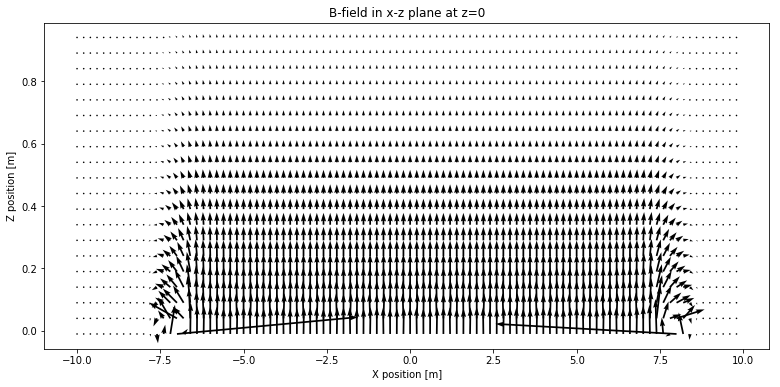

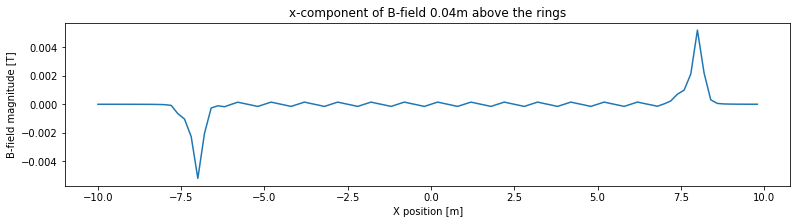

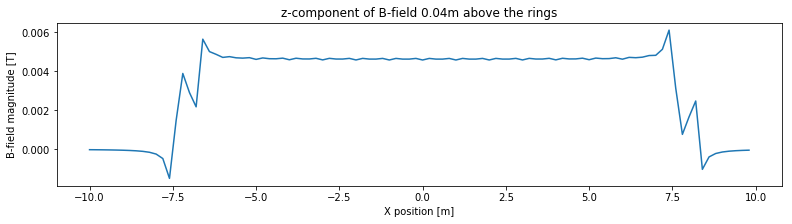

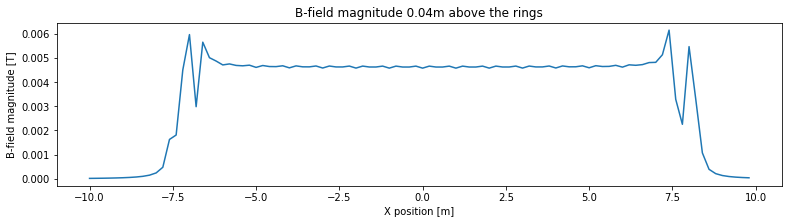

In [356]:
## define local parameters
x_pos = 0
y_pos = 0
z_min = -0.01
z_step = 0.05

## the while loop that calls the function to solve for the B-field
m = 0
num_rings = 60 # np.floor(x_max*2/R_loop)
spacing = 0.25
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*20000000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
print "FOURTH ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bx[1, :])
plt.title('x-component of B-field 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, Bz[1, :])
plt.title('z-component of B-field 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[1, :])
plt.title('B-field magnitude 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

spacing: 0.25m

It seems like as ring spacing decreases the B-field keeps on getting stronger and more uniform, which is good. We'll have to now look at how much input power is required as a function of ring spacing and decide where the optimal balance between the two occurs.

## spacing vs b_field strength
#### this cell will find the average b-field strength 0.2m above the rings as a function of ring spacing 
ring spacing will range from 0.1m to 1m in increments of 0.01m

In [336]:
x_min = -5.5
x_max = 5.5
z_min = -0.01
z_max = 1
y_value = 0
z_pos = 0

x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

## define local parameters
y_pos = 0
I = 100

## the while loop that calls the function to solve for the B-field
increments1 = 0.1 ## must change to 100 in final version
max_spacing1 = 4
num_steps1 = int(max_spacing1 / increments1)
print num_steps1
B_mag_mean1 = np.zeros(num_steps1 - 1)
print np.shape(B_mag_mean)
i = 0
while(i < (num_steps1 - 1)):
    m = 0
    spacing = 0.1 + (i*increments1)
    x_pos = x_min - 3*R_loop ## initialize the position of the first ring to the left outside of the x_range, 
                             ## so that the b-field will be uniform for the entirety of the space we are looking at
    num_rings = (-2*x_pos)/spacing ## this creates the right number of rings to span from x_min to x_max with extra space on the sides
    Bx = 0
    By = 0
    Bz = 0
    while(m < num_rings): 
        Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                              x_step, z_step, y_value,R_loop,
                              x_pos,y_pos,z_pos,I)
        Bx += Bx_temp
        By += By_temp
        Bz += Bz_temp
        m += 1 
        x_pos += spacing
    B_mag_temp = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)
    B_mag_mean1[i] = np.mean(B_mag_temp[1,:])
    print (i + 1)
    i += 1
print np.shape(B_mag_mean1)

40
(39,)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
(39,)


<function matplotlib.pyplot.show>

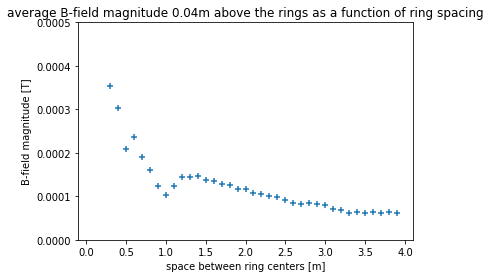

In [337]:
## for plotting
space_range1 = np.arange(0.1,max_spacing1,increments1)
plt.scatter(space_range1,B_mag_mean1, marker = "+")
plt.title('average B-field magnitude 0.04m above the rings as a function of ring spacing')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('space between ring centers [m]')
plt.ylim(ymax = 0.0005)
plt.ylim(ymin = 0)
plt.show

This graph shows that the strength of the b-field above the rings drops off exponentially as the rings become further apart from eachother. Next, we will analyze the power consumption of the track as a function of ring spacing. 

In order to determine how much power the rings consume we will apply the formula P = (I^2)R, and the formula I'm making up right now which is P(total) = P(each-ring)*(# of rings). Assuming that the rings are made up of copper wire with a diameter of 10mm and resistance of 0.000224 ohms/meter, and the rings have radius = 0.5m and current = 100 amps, the power dissipated in each ring equals 7.03 watts. The number of rings over a distance 'L' equals L / (space between each ring's center). Put these two results together and we find that the total power dissipated per meter of track equals (7.03 / space between rings)

In the next kernel we plot both b-field and the power needed by 1m of track as functions of ring spacing.

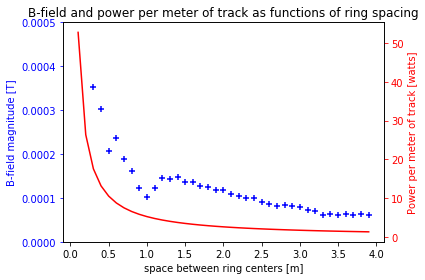

In [338]:
power_per_ring = (I**2)*R_loop*(2*np.pi*1.678e-8)/(1e-4)
power = power_per_ring / space_range


fig, ax1 = plt.subplots()

ax1.scatter(space_range,B_mag_mean, marker = "+", color = 'b')
ax1.set_xlabel('space between ring centers [m]')
ax1.set_ylabel('B-field magnitude [T]', color = 'b')
ax1.set_ylim(ymax = 0.0005)
ax1.set_ylim(ymin = 0)
ax1.tick_params('y', colors='b')
ax1.set_title('B-field and power per meter of track as functions of ring spacing')

ax2 = ax1.twinx()
ax2.plot(space_range,power, 'r')
ax2.set_ylabel('Power per meter of track [watts]', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

What we really want to maximize is the ratio of B-field strength to input power , or (B_mag_average / power). 

(39,) (39,) (39,)


<function matplotlib.pyplot.show>

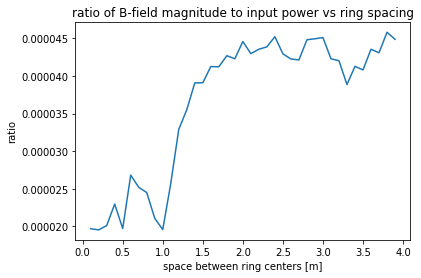

In [341]:
print np.shape(space_range),np.shape(B_mag_mean),np.shape(power)
plt.plot(space_range, (B_mag_mean / power))
plt.title('ratio of B-field magnitude to input power vs ring spacing')
plt.ylabel('ratio')
plt.xlabel('space between ring centers [m]')
#plt.ylim(ymax = 0.00005)
#plt.ylim(ymin = 0.15)
plt.show


This graph indicates that when current = 100amps and radius = 0.5m the ratio continues to get higher as the ring spacing increases. In the next couple of cells we will look into the b-field produced by rings that are spaced further apart from eachother, and see if bigger spacing is a viable option for rings on the track (this will depend on whether or not the field is uniform enough).

#### spacing = 3.0m

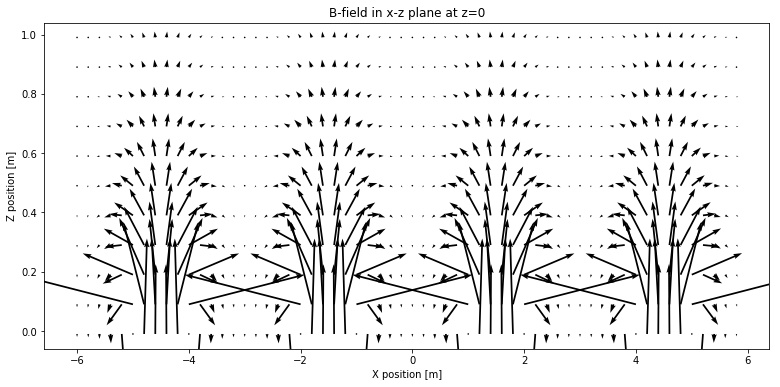

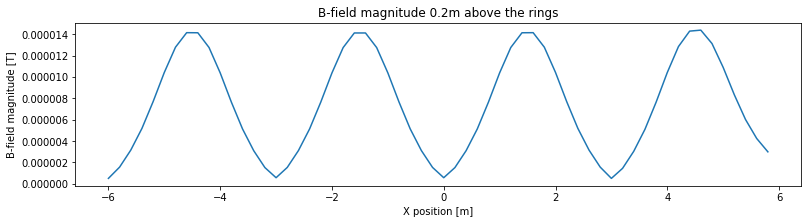

In [343]:
## define local parameters
y_pos = 0
x_step = 0.2
z_step = 0.1
x_min = -6
x_max = 6

## the while loop that calls the function to solve for the B-field
m = 0
x_pos = x_min - 3*R_loop ## initialize the position of the first ring to the left outside of the x_range, 
                             ## so that the b-field will be uniform for the entirety of the space we are looking at
num_rings = (-2*x_pos)/spacing ## this creates the right number of rings to span from x_min to x_max with extra space on the sides
spacing = 3.0
Bx = 0
By = 0
Bz = 0
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.max(B_mag)/2):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
print ""

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude 0.04m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

This b-field isn't uniform or strong enough, and increasing the current to increase the strength of the b-field give the same advantage of a high field strength to input power ratio because power increases exponentially as current increases linearly. In the next cell we repeat the process of finding the average B-field as a function of ring spacing with the spacing restricted to less than 1m in order to get a higher resolution .

In [350]:
x_min = -5.5
x_max = 5.5
z_min = -0.01
z_max = 1
y_value = 0
z_pos = 0

x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

## define local parameters
y_pos = 0
I = 100

## the while loop that calls the function to solve for the B-field
increments2 = 0.01
max_spacing2 = 1
num_steps2 = int((max_spacing2-.1) / increments2)
print num_steps2
B_mag_mean2 = np.zeros(num_steps2)
print np.shape(space_range2),np.shape(B_mag_mean2)
i = 0
while(i < (num_steps2 - 1)):
    m = 0
    spacing = 0.1 + (i*increments2)
    x_pos = x_min - 3*R_loop ## initialize the position of the first ring to the left outside of the x_range, 
                             ## so that the b-field will be uniform for the entirety of the space we are looking at
    num_rings = (-2*x_pos)/spacing ## this creates the right number of rings to span from x_min to x_max with extra space on the sides
    Bx = 0
    By = 0
    Bz = 0
    while(m < num_rings): 
        Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                              x_step, z_step, y_value,R_loop,
                              x_pos,y_pos,z_pos,I)
        Bx += Bx_temp
        By += By_temp
        Bz += Bz_temp
        m += 1 
        x_pos += spacing
    B_mag_temp = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)
    B_mag_mean2[i] = np.mean(B_mag_temp[1,:])
    print (i + 1)
    i += 1

90
(90,) (90,)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


(90,) (90,) (90,)


<function matplotlib.pyplot.show>

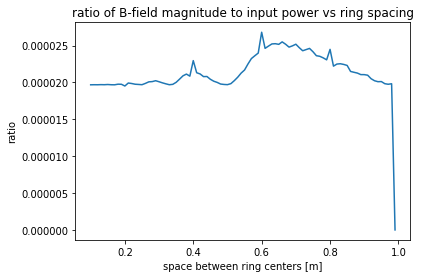

In [351]:
space_range2 = np.arange(0.1,max_spacing2,increments2)

power_per_ring = (I**2)*R_loop*(2*np.pi*1.678e-8)/(1e-4)
power2 = power_per_ring / space_range2
print np.shape(space_range2),np.shape(B_mag_mean2),np.shape(power2)

plt.plot(space_range2, (B_mag_mean2 / power2))
plt.title('ratio of B-field magnitude to input power vs ring spacing')
plt.ylabel('ratio')
plt.xlabel('space between ring centers [m]')
#plt.ylim(ymax = 0.00005)
#plt.ylim(ymin = 0.15)
plt.show

In higher resolution we can see that the greatest ratio of b-field strength to input power occurs at around 0.6m of spacing. Now we will solve for the B-field created by this arrangement of the full scale track and calculate the acceleration that the pod experiences.